# Skill 5
### Title                     : Perform Principal Component Analysis on Wine Dataset
### Name                   : Shraddha Pawar
### Batch No.            : ML 18


### PCA (Principal Component Analysis)

**The goal of PCA is to identify and detect the correlation between attributes.                                                 
If there is a strong correlation and it is found.Then PCA reduces the dimensionality.                                          
PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets,                 
by transforming a large set of variables into a smaller.** 

In [1]:
#Importing all necesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
#Read dataset

df = pd.read_csv("wine.csv")


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Checking null value or not

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#Checking the dimensions
df.shape

(1596, 12)

In [6]:
#Separating dependent and independent variable.
X = df.iloc[:, 1:11].values
y = df.iloc[:, 11].values

In [7]:
X

array([[ 0.7  ,  0.   ,  1.9  , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 0.88 ,  0.   ,  2.6  , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 0.76 ,  0.04 ,  2.3  , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 0.51 ,  0.13 ,  2.3  , ...,  3.42 ,  0.75 , 11.   ],
       [ 0.645,  0.12 ,  2.   , ...,  3.57 ,  0.71 , 10.2  ],
       [ 0.31 ,  0.47 ,  3.6  , ...,  3.39 ,  0.66 , 11.   ]])

In [8]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [9]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
# Applying PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [12]:
print(explained_variance)

[0.24819062 0.19304757 0.14756741]


In [13]:
x_pca=pca.transform(X)

In [14]:
# Final Dataframe
final_df=pd.concat([pd.DataFrame(x_pca[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

,PC1,PC2,PC3
0,3.924200,19.765460,23.148248
1,10.704833,43.021444,43.178490
2,7.669154,31.672135,33.089507
3,9.126063,35.221215,36.601071
4,3.924200,19.765460,23.148248
...,...,...,...
1591,7.301446,34.091879,38.265743
1592,8.998656,40.604585,44.940013
1593,6.470954,30.453449,35.533107
1594,7.350085,34.205518,38.153066


<AxesSubplot:>

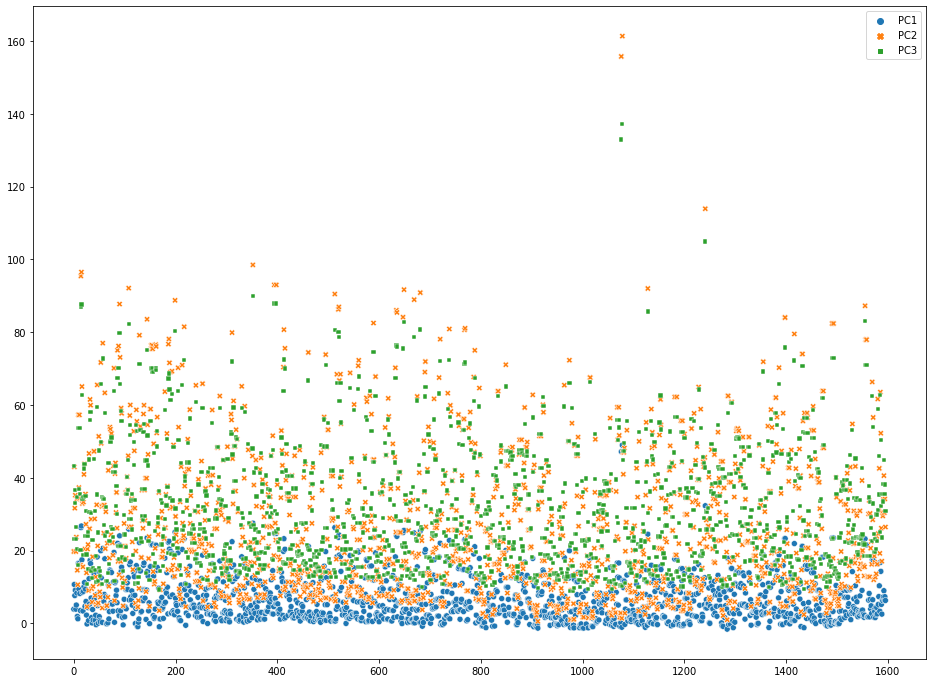

In [15]:
# Visualization of PCAs

fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=final_df)

# K-Means Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

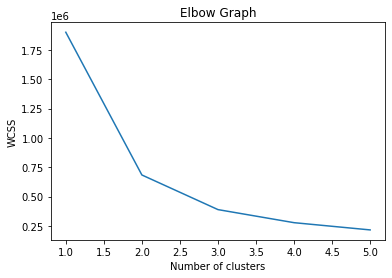

In [18]:
plt.plot(range(1,6),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Cluster algorithm using K=3
clusters3=KMeans(3,random_state=30).fit(X)
clusters3

KMeans(n_clusters=3, random_state=30)

In [20]:
clusters3.labels_

array([0, 2, 2, ..., 2, 2, 2])

In [21]:
clusters3.n_iter_

13

In [22]:
clusters3.cluster_centers_

array([[5.19666255e-01, 2.68825711e-01, 2.36186650e+00, 8.45315204e-02,
        8.98269468e+00, 2.23288010e+01, 9.96620519e-01, 3.31123609e+00,
        6.46897404e-01, 1.05773383e+01],
       [5.72293388e-01, 2.75413223e-01, 3.23181818e+00, 8.82851240e-02,
        2.61053719e+01, 1.08173554e+02, 9.96929545e-01, 3.29152893e+00,
        6.46322314e-01, 1.00084711e+01],
       [5.20568807e-01, 2.70146789e-01, 2.48422018e+00, 9.04440367e-02,
        2.15146789e+01, 5.46495413e+01, 9.96845119e-01, 3.32198165e+00,
        6.74935780e-01, 1.03725382e+01]])

In [23]:
data=df
data["Final Label"]=clusters3.labels_
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Final Label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


In [24]:
data['Final Label'].value_counts()

0    810
2    545
1    241
Name: Final Label, dtype: int64

# Hierarchical Clustering

In [25]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [26]:
# Converting data to numpy array
wine_ary=df.values
wine_ary

array([[ 7.4  ,  0.7  ,  0.   , ...,  9.4  ,  5.   ,  0.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  9.8  ,  5.   ,  2.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  9.8  ,  5.   ,  2.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ..., 11.   ,  6.   ,  2.   ],
       [ 5.9  ,  0.645,  0.12 , ..., 10.2  ,  5.   ,  2.   ],
       [ 6.   ,  0.31 ,  0.47 , ..., 11.   ,  6.   ,  2.   ]])

In [27]:
# Normalizing the numerical data 
wine_norm=scale(wine_ary)
wine_norm

array([[-0.52790985,  0.96050573, -1.3943694 , ..., -0.96331098,
        -0.7897822 , -0.92015369],
       [-0.29691763,  1.9654189 , -1.3943694 , ..., -0.58596616,
        -0.7897822 ,  1.28655598],
       [-0.29691763,  1.29547678, -1.18800687, ..., -0.58596616,
        -0.7897822 ,  1.28655598],
       ...,
       [-1.16313844, -0.10023596, -0.72369117, ...,  0.54606832,
         0.44964002,  1.28655598],
       [-1.39413066,  0.65344892, -0.7752818 , ..., -0.20862133,
        -0.7897822 ,  1.28655598],
       [-1.33638261, -1.21680616,  1.03039037, ...,  0.54606832,
         0.44964002,  1.28655598]])

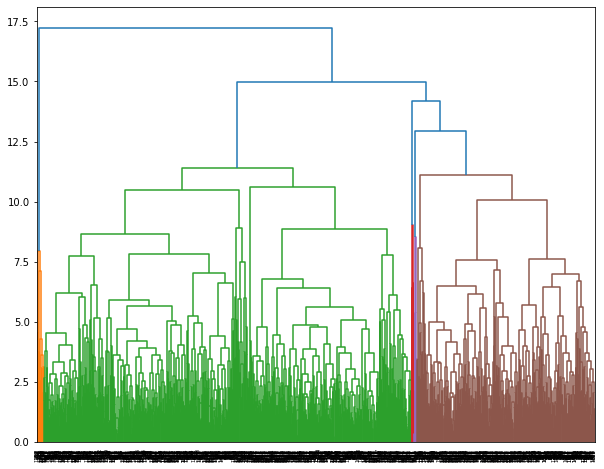

In [28]:
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(wine_norm,'complete'))

In [29]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=3)

In [30]:
y=pd.DataFrame(hclusters.fit_predict(wine_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    767
0    425
2    404
Name: clustersid, dtype: int64

In [31]:
# Adding clusters to dataset
wine=df.copy()
wine['clustersid']=hclusters.labels_
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Final Label,clustersid
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2,1
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2,1
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2,1
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2,1
